## 20daysofcode challenge
**ML | DAY 8: ADMISSION PREDICTION**
- Analyse the data and generate appropriate visualizations.
- Comment on your inference using markdown cells.
- Generate a heatmap of the correlation of all features and target in the entire dataset (Explore non-default parameters)
- Pre-process the data for training and suggest an algorithm for training.

Dataset: https://github.com/Fortune-Adekogbe/30-Days-of-ML/tree/master/Day-7

## Import Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

## Load Dataset
..into pandas dataframe

In [6]:
admission = pd.read_csv('admission.csv')
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- There are 500 samples and 500 non-null values, meaning there are no missing values in the dataset
- All features seem to be in the appropriate format.. so its safe to say our dataset is clean.
- Although, for convenience during analysis, I will change the naming style of the column names to snake_case
- Chance of admit appears to be the TARGET variable

#### Rename columns

In [8]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
admission.columns = admission.columns.str.strip().str.replace(' ', '_').str.replace('.', '').str.lower()
admission.columns

Index(['serial_no', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor', 'cgpa', 'research', 'chance_of_admit'],
      dtype='object')

#### Handling Missing Values

In [12]:
admission.isnull().sum()

serial_no            0
gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      0
dtype: int64

So we confirm there are no missing values, as stated above

In [14]:
#serial number column appears redundant, so we drop it
admission = admission.drop('serial_no', axis=1)

In [15]:
admission.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Relationship between data variables

In [40]:
admission.corr('spearman')

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
gre_score,1.000000,0.823853,0.643423,0.620688,0.514352,0.829251,0.578487,0.822201
toefl_score,0.823853,1.000000,0.645533,0.644715,0.523434,0.809485,0.474540,0.793634
university_rating,0.643423,0.645533,1.000000,0.729399,0.602319,0.703333,0.435351,0.703742
sop,0.620688,0.644715,0.729399,1.000000,0.662653,0.717384,0.409088,0.702799
lor,0.514352,0.523434,0.602319,0.662653,1.000000,0.639563,0.376166,0.643627
cgpa,0.829251,0.809485,0.703333,0.717384,0.639563,1.000000,0.509264,0.888786
research,0.578487,0.474540,0.435351,0.409088,0.376166,0.509264,1.000000,0.565715
chance_of_admit,0.822201,0.793634,0.703742,0.702799,0.643627,0.888786,0.565715,1.000000


- All features correlate postively with the target variable, with cgpa appearing to be the most correlated with chance of admit

In [24]:
#order of correlation of feature variables with the target variable
admission_corr = admission.corr('spearman')['chance_of_admit'].sort_values(ascending=False)
admission_corr

chance_of_admit      1.000000
cgpa                 0.888786
gre_score            0.822201
toefl_score          0.793634
university_rating    0.703742
sop                  0.702799
lor                  0.643627
research             0.565715
Name: chance_of_admit, dtype: float64

cgpa is the most correlated with chance of admit, follwed by gre score

Next we generate visual representaions of relationships between the variables:

###### Pairplot

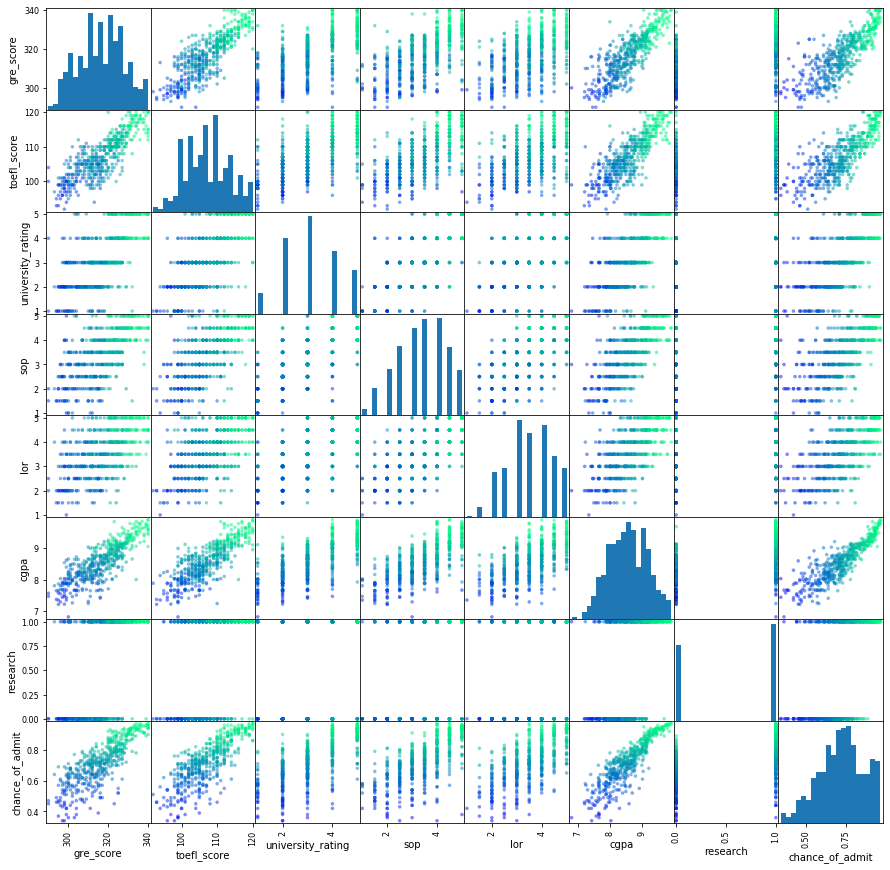

In [54]:
#pairplot
corr_plot = pd.plotting.scatter_matrix(admission, c = admission['chance_of_admit'], 
                                 figsize = (15,15), s=50, cmap = 'winter', hist_kwds={'bins':20})
plt.show()

###### Heatmap of Correlation of all features and target

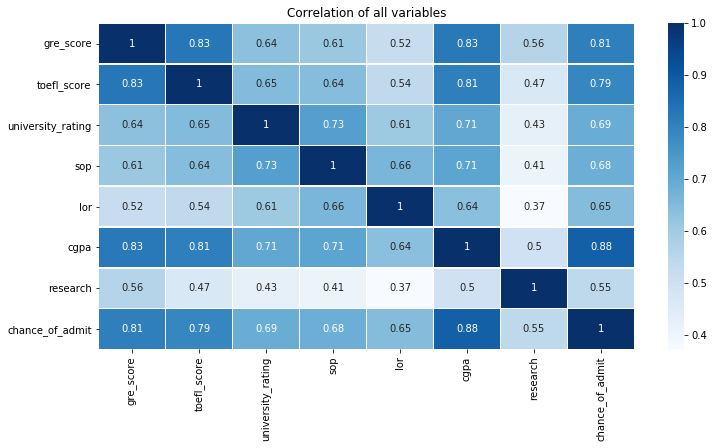

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(admission.corr(), annot=True, linewidths=.5, cmap='Blues')
plt.title('Correlation of all variables')
plt.show()

- gre score, toefl score and cgpa are noticeable highly correlated

## Feature Scaling

In [44]:
#Split the dataset into feature and target variables
X = admission.drop('chance_of_admit', axis=1)
Y = admission['chance_of_admit']

# standardize the feature variable
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)
standardized_X

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

## Algorithm Suggestion:
We note that:
- Labels are provided in the dataset - suggesting we will need to use a Supervised machine learning algorithm.
- As our goal is to make *predictions* (chances of gaining graduate admission), we need to build a *predictive model* - further narrowing down the kind of supervised ML algorithn we should consider
- The dataset is well structured and contains just about 500 samples - meaning our algorithm shouldn't require huge computational power 

With the points highlighted above, **Linear Regression** looks great for training our data